In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline

In [2]:
# 读取数据
agg = pd.read_csv("data/agg.csv",header=0,sep="\t")
print("agg.shape:",agg.shape)
agg.head()

agg.shape: (80000, 31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,USRID
0,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,-0.29641,-0.18761,-0.48351,-0.53051,...,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.27221,-0.51336,-0.32438,14233
1,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,0.37601,-0.10030,-0.16694,-0.31897,...,0.15815,-0.16201,0.4762,-0.50058,-0.77398,-0.25708,-0.37907,-0.52723,-0.32438,790
2,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.57176,0.03980,-0.17089,-0.38610,-0.46000,...,0.15815,-0.16201,0.4762,-0.55127,-0.77398,-0.25708,-0.57113,-0.54758,-0.32438,82308
3,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.30291,-0.29641,-0.18761,-0.45916,-0.53051,...,0.15815,-0.16201,0.4762,-0.26154,-0.77398,0.23440,-0.32873,-0.51951,-0.32438,90325
4,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.16849,-0.29641,-0.18761,-0.50786,-0.60103,...,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.57910,-0.54884,-0.32438,71893


In [3]:
flg = pd.read_csv("data/flg.csv",header=0,sep="\t")
print("flg.shape:",flg.shape)
flg.head()

flg.shape: (80000, 2)


,USRID,FLAG
0,0,0
1,35,0
2,42,0
3,76,0
4,77,0


In [4]:
# 正负样本比例
flg['FLAG'].value_counts()

0    76824
1     3176
Name: FLAG, dtype: int64

In [5]:
data = pd.merge(agg,flg,on='USRID')

usrid = data.pop('USRID')
y = data.pop('FLAG').values
X = data.values
print(X.shape)
print(y.shape)

(80000, 30)
(80000,)


In [6]:
#简单划分train / test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state=0)
print("训练集合的正样本数：",len(np.where(y_train==1)[0]))
print("测试集合的正样本数：",len(np.where(y_test==1)[0]))

训练集合的正样本数： 2406
测试集合的正样本数： 770


In [7]:
# 简单示例

from sklearn.metrics import roc_auc_score

# 1.构造数据结构
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

# 2.参数设置
params = {'max_depth':6, 
         'eta':0.1, 
         'silent':1, 
         'objective':'binary:logistic'
        }
# 3.xgb训练
xgb_model = xgb.train(params, dtrain,num_boost_round = 200)

# 4.xgb预测,返回概率！！！！！！！！！！！！
preds = xgb_model.predict(dtest)

# 5.评测模型
roc = roc_auc_score(y_test,preds)

print("test set roc = ",roc)


test set roc =  0.748643218456


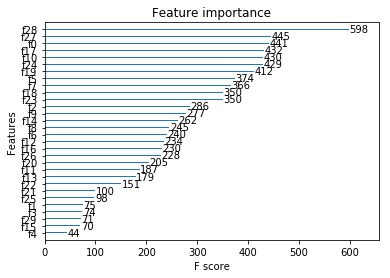

In [8]:
# 绘制特征重要性
xgb.plot_importance(xgb_model,title='Feature importance', xlabel='F score', ylabel='Features', importance_type='weight',grid=False)


In [9]:
# 想要观察性能，可以改成

# 观察train set 的训练效果
evallist = [(dtrain,'train')]

# 指定参数评价指标
params['eval_metric'] = ['auc'] 

xgb_model = xgb.train(params, dtrain,num_boost_round = 50,evals = evallist, verbose_eval=True)


[0]	train-auc:0.731031
[1]	train-auc:0.741721
[2]	train-auc:0.749164
[3]	train-auc:0.754293
[4]	train-auc:0.756713
[5]	train-auc:0.757836
[6]	train-auc:0.760257
[7]	train-auc:0.766009
[8]	train-auc:0.768055
[9]	train-auc:0.770998
[10]	train-auc:0.773373
[11]	train-auc:0.773672
[12]	train-auc:0.77621
[13]	train-auc:0.777681
[14]	train-auc:0.778925
[15]	train-auc:0.779926
[16]	train-auc:0.781876
[17]	train-auc:0.784303
[18]	train-auc:0.786366
[19]	train-auc:0.788976
[20]	train-auc:0.791631
[21]	train-auc:0.793583
[22]	train-auc:0.795265
[23]	train-auc:0.796422
[24]	train-auc:0.797781
[25]	train-auc:0.79902
[26]	train-auc:0.800906
[27]	train-auc:0.802205
[28]	train-auc:0.804381
[29]	train-auc:0.806031
[30]	train-auc:0.807906
[31]	train-auc:0.810557
[32]	train-auc:0.812231
[33]	train-auc:0.814388
[34]	train-auc:0.81625
[35]	train-auc:0.817877
[36]	train-auc:0.81884
[37]	train-auc:0.819511
[38]	train-auc:0.82117
[39]	train-auc:0.823443
[40]	train-auc:0.8261
[41]	train-auc:0.827417
[42]	trai

In [10]:
# 加入验证集合,可以观察性能（+ 提前停止 ）

# 1.构造数据结构
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

# 2.参数设置
params = {'max_depth':6, 
         'eta':0.1, 
         'silent':1, 
         'objective':'binary:logistic'
        }

# 指定验证集观察性能
evallist = [ (dtrain,'train'),(dtest,'eval')]

# 指定参数评价指标
params['eval_metric'] = ['auc'] 

# 3.xgb训练，加入早停, 按照最后一个集合 eval-auc 实现早停
xgb_model = xgb.train(params, dtrain,
                      num_boost_round = 50, 
                      evals = evallist,
                      early_stopping_rounds=10,
                      verbose_eval=True)


[0]	train-auc:0.731031	eval-auc:0.724641
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.741721	eval-auc:0.727228
[2]	train-auc:0.749164	eval-auc:0.731779
[3]	train-auc:0.754293	eval-auc:0.733311
[4]	train-auc:0.756713	eval-auc:0.731859
[5]	train-auc:0.757836	eval-auc:0.732481
[6]	train-auc:0.760257	eval-auc:0.735033
[7]	train-auc:0.766009	eval-auc:0.736881
[8]	train-auc:0.768055	eval-auc:0.7381
[9]	train-auc:0.770998	eval-auc:0.738075
[10]	train-auc:0.773373	eval-auc:0.74052
[11]	train-auc:0.773672	eval-auc:0.742814
[12]	train-auc:0.77621	eval-auc:0.743384
[13]	train-auc:0.777681	eval-auc:0.743472
[14]	train-auc:0.778925	eval-auc:0.743148
[15]	train-auc:0.779926	eval-auc:0.742392
[16]	train-auc:0.781876	eval-auc:0.742975
[17]	train-auc:0.784303	eval-auc:0.741598
[18]	train-auc:0.786366	eval-auc:0.742212
[19]	train-auc:0.788976	eval-auc:0.742909
[20]	train-auc:0.791631	eval-auc:

In [11]:
# cv函数
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value

xgb.cv(params, dtrain, 
             num_boost_round=50, 
             nfold=3,
             metrics={'auc'},
             callbacks=[xgb.callback.print_evaluation(show_stdv=False),
                        xgb.callback.early_stop(3)]
             )

[0]	train-auc:0.72137	test-auc:0.699629
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 3 rounds.
[1]	train-auc:0.731048	test-auc:0.707138
[2]	train-auc:0.739926	test-auc:0.714707
[3]	train-auc:0.751026	test-auc:0.723035
[4]	train-auc:0.759215	test-auc:0.7275
[5]	train-auc:0.76259	test-auc:0.730267
[6]	train-auc:0.767243	test-auc:0.732724
[7]	train-auc:0.77002	test-auc:0.733564
[8]	train-auc:0.771459	test-auc:0.734444
[9]	train-auc:0.775569	test-auc:0.736709
[10]	train-auc:0.778854	test-auc:0.737133
[11]	train-auc:0.780681	test-auc:0.73694
[12]	train-auc:0.78301	test-auc:0.737656
[13]	train-auc:0.786128	test-auc:0.737393
[14]	train-auc:0.787593	test-auc:0.737303
[15]	train-auc:0.789461	test-auc:0.737403
Stopping. Best iteration:
[12]	train-auc:0.78301+0.00191871	test-auc:0.737656+0.00125595



,test-auc-mean,test-auc-std,train-auc-mean,train-auc-std
0,0.699629,0.006040,0.721370,0.002909
1,0.707138,0.011290,0.731048,0.007491
2,0.714707,0.012592,0.739926,0.011651
3,0.723035,0.003014,0.751026,0.006190
4,0.727500,0.003132,0.759215,0.005000
5,0.730267,0.004332,0.762590,0.004799
6,0.732724,0.000996,0.767243,0.004232
7,0.733564,0.001628,0.770020,0.003561
8,0.734444,0.000600,0.771459,0.003926
9,0.736709,0.001885,0.775569,0.002666


In [12]:
# Scikit-Learn 的 API

# 设置参数
param_list = {
    'max_depth':6, 
    'learning_rate':0.1, 
    'n_estimators':200,
    'silent':True, 
    'objective':'binary:logistic',
}
clf = xgb.XGBClassifier(**param_list)
# 训练
clf.fit(X_train, y_train)

# 预测,正类的概率！！！！！！！！！！！！！
preds = clf.predict_proba(X_test)[:,1]

# 评估
roc = roc_auc_score(y_test,preds)

print("test set roc = ",roc)


test set roc =  0.748643218456


In [13]:
# 有验证集合的时候，加入早停

# 设置参数
param_list = {
    'max_depth':6, 
    'learning_rate':0.1, 
    'n_estimators':50,
    'silent':1, 
    'objective':'binary:logistic',
}
clf = xgb.XGBClassifier(**param_list)
clf.fit(X_train, y_train, 
        early_stopping_rounds=10, 
        eval_metric="auc",
        eval_set=[(X_train, y_train),(X_test, y_test)],
        verbose=True
       )


[0]	validation_0-auc:0.731031	validation_1-auc:0.724641
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.741721	validation_1-auc:0.727228
[2]	validation_0-auc:0.749164	validation_1-auc:0.731779
[3]	validation_0-auc:0.754293	validation_1-auc:0.733311
[4]	validation_0-auc:0.756713	validation_1-auc:0.731859
[5]	validation_0-auc:0.757836	validation_1-auc:0.732481
[6]	validation_0-auc:0.760257	validation_1-auc:0.735033
[7]	validation_0-auc:0.766009	validation_1-auc:0.736881
[8]	validation_0-auc:0.768055	validation_1-auc:0.7381
[9]	validation_0-auc:0.770998	validation_1-auc:0.738075
[10]	validation_0-auc:0.773373	validation_1-auc:0.74052
[11]	validation_0-auc:0.773672	validation_1-auc:0.742814
[12]	validation_0-auc:0.77621	validation_1-auc:0.743384
[13]	validation_0-auc:0.777681	validation_1-auc:0.743472
[14]	validation_0-auc:0.778925	validation_1-auc:0.743148
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=1)

In [14]:
# 请注意 train() 将从上一次迭代中返回一个模型, 而不是最好的一个.！！！！
# 所以这里是  迭代23次  的结果！！！！！！

# 预测,正类的概率
preds = clf.predict_proba(X_test)[:,1]

# 评估
roc = roc_auc_score(y_test,preds)

print("test set roc = ",roc)

test set roc =  0.740091611457


In [15]:
# 获得最好的模型效果,  13次迭代  ！！！！！！

# 预测,正类的概率
preds = clf.predict_proba(X_test,ntree_limit=clf.best_ntree_limit)[:,1]

# 评估
roc = roc_auc_score(y_test,preds)

print("test set roc = ",roc)

test set roc =  0.74347205057


In [44]:
# 网格超参数调节
# 1.初始参数效果 

# 设置初始化参数
param_list = {
    # 通用参数
    'booster':'gbtree',       # gbtree：基于树的模型 ，gbliner：线性模型
    'nthread':-1,             # 进行多线程控制，-1自动检验全部的cpu核数
    'silent':1,               # 参数值为1时，静默模式开启，不会输出任何信息
    # booster参数
    'learning_rate':0.1,      # 默认 ：0.3 ，典型：0.01-0.2
    'max_depth':6,            # 默认：6，典型：3-10，树的最大深度，避免过拟合的。max_depth越大，模型会学到更具体更局部的样本。
    'min_child_weight':1,     # 默认：1，最小叶子节点样本权重和，避免过拟合。当它的值较大时，可以避免模型学习到局部的特殊样本
    'gamma':0,                # 默认：0，分裂后损失函数的值下降了，才会分裂这个节点。Gamma指定了节点分裂所需的最小损失函数下降值
    'subsample':0.8,          # 默认：1，典型：0.5-1.控制对于每棵树，随机采样的比例。减小这个参数的值，算法会更加保守，避免过拟合
    'colsample_bytree':0.8,      # 默认：1,控制每棵随机采样的列数的占比(每一列是一个特征)
    'reg_alpha':0,            # 默认：0,权重的L1正则化项
    'reg_lambda':1,           # 默认：1,权重的L2正则化项
    'scale_pos_weight':1,     # 默认：0,在各类别样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛
    # 学习目标参数
    'objective':'binary:logistic', # binary:logistic 二分类的逻辑回归，返回预测的概率(不是类别)。
    'eval_metric':'auc',           # 度量方法
    'seed':0,                      # 随机数的种子
    # 命令行参数
    'n_estimators':200             # 迭代次数
}
clf = xgb.XGBClassifier(**param_list)
# 训练
clf.fit(X_train, y_train)

# 预测,正类的概率
preds = clf.predict_proba(X_test)[:,1]

# 评估
roc = roc_auc_score(y_test,preds)

print("test set roc = ",roc)


test set roc =  0.748675263894


In [49]:
# 2.最佳迭代次数：n_estimators
from sklearn.model_selection import GridSearchCV

cv_params = {'n_estimators': [50,100,150,200,250]}

model = xgb.XGBClassifier(**param_list)
gs = GridSearchCV(estimator=model, param_grid=cv_params,scoring = 'roc_auc',n_jobs = 4,cv = 3,verbose=1)
gs.fit(X_train,y_train)
print('参数的最佳取值：{0}'.format(gs.best_params_))
print('最佳模型得分:{0}'.format(gs.best_score_))


Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  3.0min finished


参数的最佳取值：{'n_estimators': 100}
最佳模型得分:0.7533039233184186


In [50]:
# 3.min_child_weight以及max_depth参数调优

# !!!!!之前一定修改上次调优的参数
param_list['n_estimators'] = 100

cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
             'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8]
            }
model = xgb.XGBClassifier(**param_list)
gs = GridSearchCV(estimator=model, param_grid=cv_params,scoring = 'roc_auc',n_jobs = 4,cv = 3,verbose=1)
gs.fit(X_train,y_train)
print('参数的最佳取值：{0}'.format(gs.best_params_))
print('最佳模型得分:{0}'.format(gs.best_score_))


Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=4)]: Done 192 out of 192 | elapsed: 21.9min finished


参数的最佳取值：{'max_depth': 4, 'min_child_weight': 8}
最佳模型得分:0.7603068846271653


In [52]:
# 4.gamma参数调优

# !!!!!之前一定修改上次调优的参数
param_list['max_depth'] = 4
param_list['min_child_weight'] = 8

cv_params = {'gamma': [0, 0.1, 0.2, 0.3, 0.4]}

model = xgb.XGBClassifier(**param_list)
gs = GridSearchCV(estimator=model, param_grid=cv_params,scoring = 'roc_auc',n_jobs = 4,cv = 3,verbose=1)
gs.fit(X_train,y_train)
print('参数的最佳取值：{0}'.format(gs.best_params_))
print('最佳模型得分:{0}'.format(gs.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.3min finished


参数的最佳取值：{'gamma': 0.1}
最佳模型得分:0.760631118751373


In [53]:
# 5.调整subsample 和 colsample_bytree 参数

# !!!!!之前一定修改上次调优的参数
param_list['gamma'] = 0.1

cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9, 1],
             'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1]}

model = xgb.XGBClassifier(**param_list)
gs = GridSearchCV(estimator=model, param_grid=cv_params,scoring = 'roc_auc',n_jobs = 4,cv = 3,verbose=1)
gs.fit(X_train,y_train)
print('参数的最佳取值：{0}'.format(gs.best_params_))
print('最佳模型得分:{0}'.format(gs.best_score_))

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:  5.7min finished


参数的最佳取值：{'colsample_bytree': 0.8, 'subsample': 0.8}
最佳模型得分:0.760631118751373


In [55]:
# 6.正则化参数调优

# !!!!!之前一定修改上次调优的参数
param_list['subsample'] = 0.8
param_list['colsample_bytree'] = 0.8

cv_params = {'reg_alpha': [0,0.001,0.005,0.05, 0.1, 1, 2, 3]}

model = xgb.XGBClassifier(**param_list)
gs = GridSearchCV(estimator=model, param_grid=cv_params,scoring = 'roc_auc',n_jobs = 4,cv = 3,verbose=1)
gs.fit(X_train,y_train)
print('参数的最佳取值：{0}'.format(gs.best_params_))
print('最佳模型得分:{0}'.format(gs.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  1.9min finished


参数的最佳取值：{'reg_alpha': 0}
最佳模型得分:0.760631118751373


In [56]:
# 7.降低学习速率
# 降低学习率，就需要增大迭代次数

param_list['reg_alpha'] = 0

cv_params = {'learning_rate': [0.01, 0.05, 0.09, 0.1, 0.2]}

model = xgb.XGBClassifier(**param_list)
gs = GridSearchCV(estimator=model, param_grid=cv_params,scoring = 'roc_auc',n_jobs = 4,cv = 3,verbose=1)
gs.fit(X_train,y_train)
print('参数的最佳取值：{0}'.format(gs.best_params_))
print('最佳模型得分:{0}'.format(gs.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:  1.2min finished


参数的最佳取值：{'learning_rate': 0.1}
最佳模型得分:0.760631118751373


In [57]:
# 最后的最佳参数

param_list['learning_rate'] = 0.1
param_list

{'booster': 'gbtree',
 'colsample_bytree': 0.8,
 'eval_metric': 'auc',
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 8,
 'n_estimators': 100,
 'nthread': -1,
 'objective': 'binary:logistic',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'silent': 1,
 'subsample': 0.8}

In [58]:
# 最后测试一下

clf = xgb.XGBClassifier(**param_list)
# 训练
clf.fit(X_train, y_train)

# 预测,正类的概率
preds = clf.predict_proba(X_test)[:,1]

# 评估
roc = roc_auc_score(y_test,preds)

print("test set roc = ",roc)

# 相比于初始化的参数：0.748675263894 有了提升！！！！！！！！！！！！！

test set roc =  0.757240951976
